In [1]:
import pandas as pd
import numpy as np

# pour lire le pickle du dataset cleant by le prof
df = pd.read_pickle("trees_first_clean.pkl")
df

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
0,26607,ESP28435,ESP151,Arbre de voirie,ESP1203,Esplan ceinture Nord-Ouest,2,Platanus,acerifolia,NaN,Arbre adulte,1950.0,Ville de Grenoble,5.716292,45.196264
1,11911,ESP28202,ESP151,Arbre de voirie,ESP1203,Esplan ceinture Nord-Ouest,2,Platanus,acerifolia,NaN,Arbre vieillissant,1950.0,Grenoble Alpes Métropole,5.716512,45.196098
2,11907,ESP28201,ESP151,Arbre de voirie,ESP1203,Esplan ceinture Nord-Ouest,2,Platanus,acerifolia,NaN,Arbre vieillissant,1950.0,Ville de Grenoble,5.716264,45.197099
3,22916,ESP28136,ESP151,Arbre de voirie,ESP1203,Esplan ceinture Nord-Ouest,2,Platanus,acerifolia,NaN,Arbre adulte,1950.0,Ville de Grenoble,5.716387,45.196118
4,15569,ESP27664,ESP151,Arbre de voirie,ESP1203,Esplan ceinture Nord-Ouest,2,Platanus,acerifolia,NaN,Arbre vieillissant,1950.0,Ville de Grenoble,5.716079,45.196596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31847,7726,ESP10681,ESP065,Arbre d'enceintes fermées,ESP1183,Sq Moucherotte jeux de boules,1,Tilia,tomentosa,NaN,Arbre adulte,1983.0,Ville de Grenoble,5.706034,45.190604
31848,22508,ESP6717,ESP065,Arbre d'enceintes fermées,ESP1183,Sq Moucherotte jeux de boules,1,Populus,nigra,Italica,Arbre adulte,1983.0,Ville de Grenoble,5.705942,45.191182
31849,15198,ESP5916,ESP065,Arbre d'enceintes fermées,ESP1183,Sq Moucherotte jeux de boules,1,Populus,nigra,Italica,Arbre adulte,1983.0,Ville de Grenoble,5.705786,45.191089
31850,18825,ESP5421,ESP065,Arbre d'enceintes fermées,ESP1183,Sq Moucherotte jeux de boules,1,Populus,nigra,Italica,Arbre adulte,1983.0,Ville de Grenoble,5.705631,45.191010


In [2]:
# On split les données en train et test set
y = df.pop("ANNEEDEPLANTATION")
X = df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

# Attention, s'il y a des valeurs uniques dans notre dataset, utiliser StratifiedTestTrainSplit commme dans le book

(24589, 14) (6148, 14)


In [3]:
# Avant de tester quoique ce soit, on visualise les données pour essayer d'observer des tendances

# on concatène le X_train et y_train pour pouvoir avoir toutes les variables qu'on veut tester 
train_set = pd.concat([X_train, y_train], axis=1).copy()

In [4]:
train_set.describe()

,ELEM_POINT_ID,ADR_SECTEUR,LONGITUDE,LATITUDE,ANNEEDEPLANTATION
count,24589.000000,24589.000000,24589.000000,24589.000000,24589.000000
mean,18396.391476,3.852170,5.727439,45.176972,1989.276994
std,11103.411310,1.699812,0.012826,0.011946,17.220210
min,2.000000,1.000000,5.697915,45.151707,1924.000000
25%,8957.000000,2.000000,5.717651,45.166060,1975.000000
50%,17951.000000,4.000000,5.729805,45.175550,1985.000000
75%,26991.000000,5.000000,5.737399,45.186872,2004.000000
max,43041.000000,6.000000,5.798704,45.224825,2019.000000


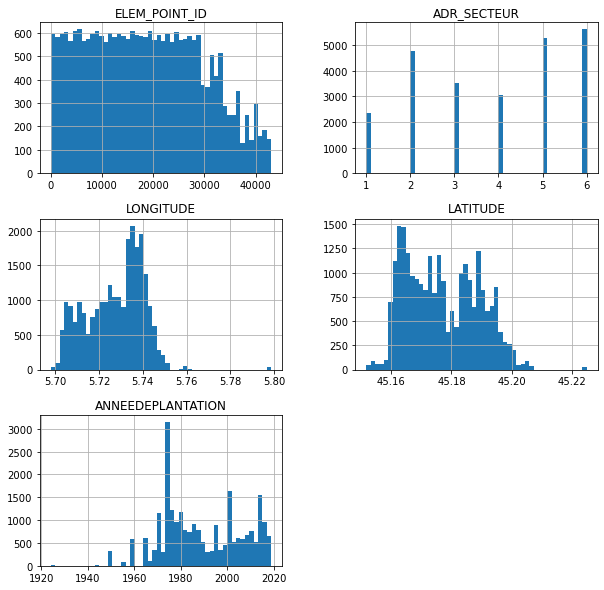

In [5]:
train_set.hist(bins=50, figsize = (10,10));

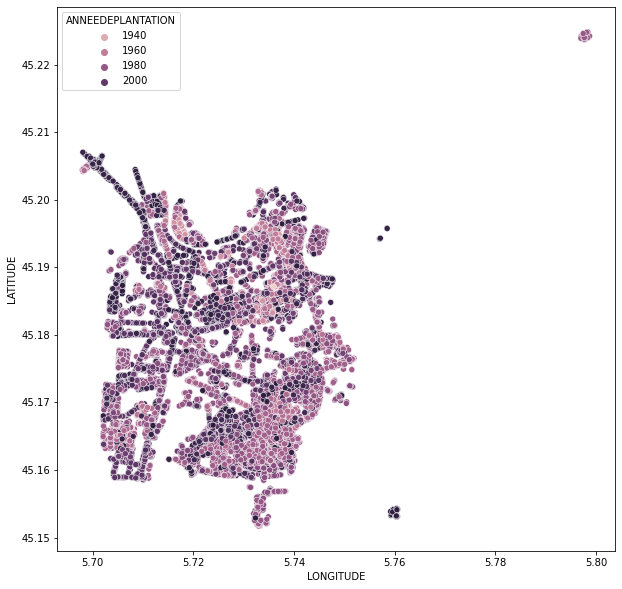

In [6]:
# on plot l'année de plantation en fonction de longitude et latitude (pour d'autres plots, voir notebook prof)
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ANNEEDEPLANTATION",
                     data=train_set, ax=ax );

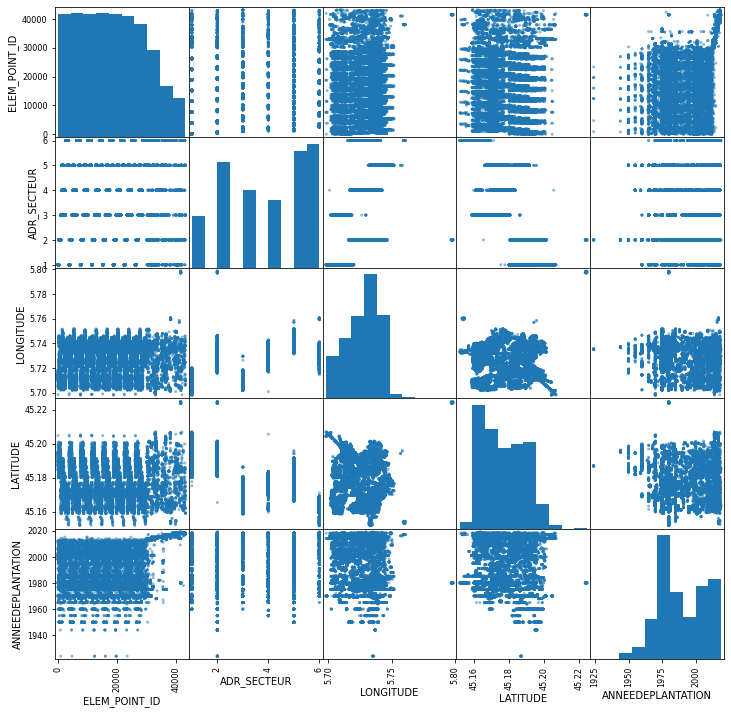

In [7]:
pd.plotting.scatter_matrix(train_set, figsize=(12,12));
# il ne semble pas y avoir de corrélation

In [8]:
# On crée un modèle naïf : un modèle très basique sur lequel on va s'appuyer pour comparer les performances de nos
# modèles fittés. Pour cela, on prend tout simplement le y_train et on récupère ses infos.
y_train.mean()

1989.2769937777055

In [9]:
# On regarde la taille du X_test
X_test.shape

(6148, 14)

In [10]:
# on crée un tableau avec des 1 de la taille du X_test, et on remplace les 1 par des 1985 par multiplication
# on considère que c'est notre prédiction pour le modèle naïf
y_test_pred = np.ones(len(X_test)) * y_train.mean()

In [11]:
# on calcule l'erreur de ce modèle naïf
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print('Root mean squared error: ', np.sqrt(mse))
# en moyenne on se trompe de ~17 ans dans nos prédictions d'année de plantation.

Root mean squared error:  16.870649704972706


In [12]:
# On va d'abord tester notre modèle sur peu de colonnes, et complexifier si besoin le modèle en rajoutant des
# colonnes (et donc des données)
Xtrain_simplifie = X_train[['ADR_SECTEUR','LATITUDE','LONGITUDE']]
Xtest_simplifie = X_test[['ADR_SECTEUR','LATITUDE','LONGITUDE']]

In [13]:
# On met en place des pipelines : séries de transformations (preprocessing) à appliquer aux différentes
# variables du jeu de données

# On importe les modules des transformations qu'on va faire

from sklearn.pipeline import make_pipeline # crée des pipelines
from sklearn.compose import make_column_transformer # applique des pipelines données à des variables données
from sklearn.impute import SimpleImputer # enlève ou remplace les NaN
from sklearn.preprocessing import OrdinalEncoder # transforme les valeurs de catégories en nbre avec classement
from sklearn.preprocessing import OneHotEncoder # transforme les valeurs de catégories en nbre ss classement
from sklearn.preprocessing import StandardScaler # standardize les valeurs numériques

In [14]:
# On stocke les noms des colonnes du df dans lesquelles on veut appliquer les différentes transformations

# toutes les colonnes catégorielles avec "classement" (ordinal encoder)
# cat_classement_attribs = ["STADEDEDEVELOPPEMENT"]

# toutes les colonnes catégorielles où il n'y a pas de "classement" (one hot encoder)
cat_attribs = ['ADR_SECTEUR']

# toutes les colonnes à standardiser
std_attribs = ["LONGITUDE","LATITUDE"]

In [15]:
# On crée les pipelines avec les transformations à effectuer - il faut aussi donner des valeurs aux NaN sinon
# l'algorithme ne peut pas fonctionner

cat_classement_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                        OrdinalEncoder())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder())
std_pipeline = make_pipeline(SimpleImputer(),
                             StandardScaler())

full_pipeline = make_column_transformer(
                                        (cat_pipeline, cat_attribs),
                                        (std_pipeline, std_attribs))#(cat_classement_pipeline, cat_classement_attribs)

In [16]:
# On applique le pipeline aux données. Attention, en fit_transformant les Xtrain, les transformateurs récupèrent
# lui donne des infos (moyenne, valeur la plus redondante, std etc.) pour faire la transformation sur les Xtrain.
# Pour les test, on veut qu'il récupère le fit des Xtrain (leur moyenne, etc), mais on veut pas qu'il le fasse pour 
# le test sinon la prédiction sera faussée. Alors on fait que transform pour les Xtest.

Xtrain_simplifie_prepared = full_pipeline.fit_transform(Xtrain_simplifie)

In [17]:
# On teste plusieurs modèles en faisant de la cross-validation, on choisit le meilleur modèle en regardant la moyenne
# des RMSE pour chaque modèle et leur écart-type (doivent être les plus petits possibles chacun - "robustesse")

from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import SGDClassifier

# lin_reg = LinearRegression()
regressor = RandomForestRegressor(n_estimators=5, random_state=42)
# tree_reg = DecisionTreeRegressor(random_state=42)
# classifier = KNeighborsClassifier(n_neighbors=5)
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

cv_scores = cross_val_score(regressor, Xtrain_simplifie_prepared, y_train, scoring='neg_mean_squared_error', cv=10)

pd.Series(np.sqrt(-cv_scores)).describe() # describe est une fonction pandas et cv-scores est un objet numpy.
# on le convertit en objet pandas pour appliquer describe


# Faire varier le nombre de variable dans X_train pour faire diminuer le RMSE pour chaque modèle

count    10.000000
mean     10.694053
std       0.189121
min      10.381518
25%      10.625632
50%      10.685254
75%      10.765419
max      11.093552
dtype: float64

In [18]:
# Lin reg : 13.2
# Rdm for : 8.0
# Tree reg : 8.8
# Knb clas : 9.8
# SGD clas : 19.4

# le modèle donnant la RMSE la plus basse est RandomForest. On va donc l'utiliser.

In [19]:
# On tune les hyperparamètres du modèle
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[1,10,50,100,500],'max_depth':[2,10],'max_features':('auto','sqrt','log2')}
regressor = RandomForestRegressor()
RF = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')

In [20]:
# On fit le modèle avec l'ensemble des X_train (sur le modèle avec les meilleurs paramètres)
RF.fit(Xtrain_simplifie_prepared, y_train)
RF.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}

In [21]:
# on peut afficher les résultats du gridsearch dans un df. rank_test_score donne le rang en fonction de mean_test_score
pd.DataFrame(RF.cv_results_)

# avec les meilleurs params, on a une moyenne qui tombe à 3.18 << 17 avec le modèle naïf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010172,0.001163,0.000798,0.000399,2,auto,1,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-263.691121,-273.088936,-267.912949,-273.202419,-275.484772,-270.676039,4.283744,21
1,0.070116,0.002092,0.002004,0.000645,2,auto,10,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-261.759194,-270.999034,-266.450381,-271.689103,-274.131565,-269.005856,4.392950,19
2,0.346622,0.002064,0.007384,0.000496,2,auto,50,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-261.728234,-271.238952,-265.929356,-271.715927,-274.330906,-268.988675,4.541245,17
3,0.686705,0.011380,0.014966,0.001540,2,auto,100,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-261.968488,-270.947741,-266.077206,-271.590220,-274.431141,-269.002959,4.426852,18
4,3.347371,0.046889,0.082576,0.028468,2,auto,500,"{'max_depth': 2, 'max_features': 'auto', 'n_es...",-261.744392,-270.820596,-266.064593,-271.668074,-274.238063,-268.907144,4.451693,16
5,0.004787,0.001596,0.000798,0.000399,2,sqrt,1,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-272.218966,-281.047485,-288.778899,-279.267110,-288.711671,-282.004826,6.245710,30
6,0.038406,0.001980,0.002584,0.000482,2,sqrt,10,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-267.619585,-271.943636,-270.829635,-276.799756,-278.146334,-273.067789,3.890377,25
7,0.168006,0.014435,0.007378,0.000797,2,sqrt,50,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-268.897410,-273.439622,-271.018733,-276.313845,-278.297128,-273.593348,3.412646,28
8,0.343310,0.015937,0.014568,0.000801,2,sqrt,100,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-269.032174,-273.200540,-269.969675,-277.297422,-277.414845,-273.382931,3.526818,27
9,1.452497,0.061208,0.063257,0.004742,2,sqrt,500,"{'max_depth': 2, 'max_features': 'sqrt', 'n_es...",-268.442505,-273.436830,-270.005476,-277.181307,-277.461182,-273.305460,3.656438,26


In [22]:
# on transforme le X_test_simplifié
Xtest_simplifie_prepared = full_pipeline.transform(Xtest_simplifie)

# on prédit les y_test à partir des X_test
y_pred_test_simplifie = RF.predict(Xtest_simplifie_prepared)

# on calcule l'erreur entre les y prédits et les y réels : score du modèle
RF_mse = mean_squared_error(y_test, y_pred_test_simplifie)
RF_rmse = np.sqrt(RF_mse)
print("MSE random forest :",RF_mse,"\nRMSE random forest :",RF_rmse)

MSE random forest : 147.04385240745083 
RMSE random forest : 12.126163960933846


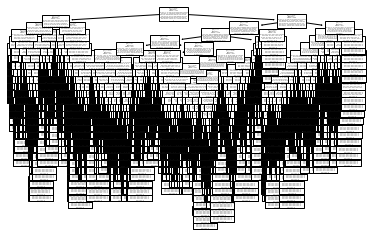

In [23]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain_simplifie, y_train)
tree.plot_tree(clf);